In [2]:
import os
import sys
import tensorflow as tf

directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from NsgaII import Nsga_II
from utils.load_data import load_mnist
from CapsNet import CapsNet

(X_train, y_train), (X_test , y_test) = load_mnist(size=(5000, 3000))

In [3]:
import json
with open('../saved_ga/mnist-gpu0-hpc-2/solutions.json') as file:
    solutions = json.load(file)
    params = solutions['Solution 2']['params']

# params = {'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}

print(params)
NasCapsNet = CapsNet(**params)
NasCapsNet._name = 'NasCapsNet'
NasCapsNet.compile()
NasCapsNet.summary()

{'epochs': 5, 'r': 2, 'no_of_conv_kernels': 64, 'secondary_capsule_vector': 6, 'dense_1': 256, 'dense_2': 512, 'epsilon': 0.08411185848750914, 'm_plus': 0.9504174153527706, 'm_minus': 0.1648052052496743, 'lambda_': 0.6831030565866469, 'alpha': 0.006858184909559632, 'no_of_primary_capsules': 32, 'primary_capsule_vector': 8, 'no_of_secondary_capsules': 10}
Model: "NasCapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                             

In [4]:
NasCapsNet.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 5/5: 100%|██████████| 79/79 [00:17<00:00,  4.48it/s, Training loss : 0.0019, Validation loss : 0.0023]


{'accuracy': ListWrapper([0.9594, 0.9812, 0.9866, 0.9904, 0.993]),
 'loss': ListWrapper([0.4792872816324234, 0.24276755284518003, 0.2150713698938489, 0.20108078606426716, 0.19372839014977217]),
 'val_accuracy': ListWrapper([0.9323333333333333, 0.957, 0.957, 0.9606666666666667, 0.965]),
 'val_loss': ListWrapper([0.3030965104699135, 0.25092526338994503, 0.24128463119268417, 0.23487857542932034, 0.23191755171865225])}

In [5]:
n_rounds = 100

import time

caps_nas_inv_time = []
for i in range(n_rounds):
    start = time.time()
    NasCapsNet.predict(X_test)
    end = time.time()
    caps_nas_inv_time.append((end - start) / len(X_test) * 1000)
caps_nas_inv_time

[0.5109597047170004,
 0.5553449789683024,
 0.522291342417399,
 0.5164093176523844,
 0.5207653840382894,
 0.5194590091705322,
 0.5050837198893229,
 0.5177692572275798,
 0.5146679878234863,
 0.5080503622690836,
 0.5128426551818848,
 0.5310450394948324,
 0.5331743558247884,
 0.514673630396525,
 0.5018850167592367,
 0.5235303243001301,
 0.6353039741516113,
 0.5290686289469402,
 0.5466570059458414,
 0.5293352603912354,
 0.5520129998524984,
 0.5409286816914877,
 0.5308936436971028,
 0.5190963745117188,
 0.5184393723805745,
 0.5109976927439372,
 0.5271682739257812,
 0.5038696924845378,
 0.5212576389312744,
 0.5254967212677002,
 0.5037044684092203,
 0.511841615041097,
 0.5343490441640217,
 0.5000363190968832,
 0.5062482357025146,
 0.5045062700907389,
 0.5087973276774088,
 0.5277570883433024,
 0.5307888984680176,
 0.5456240177154541,
 0.5364922682444254,
 0.5378846327463785,
 0.5525489648183187,
 0.5184316635131836,
 0.5489409764607747,
 0.5180916786193848,
 0.5164226690928141,
 0.5275537172953

In [6]:
import numpy as np
np.mean(caps_nas_inv_time)

0.5256842692693074

In [7]:
params = {
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "dense_1": 512,
    "dense_2": 1024
}

{
    'epochs': 5, 
    'r': 2,
    'no_of_conv_kernels': 64,
    'secondary_capsule_vector': 6,
    'dense_1': 256,
    'dense_2': 512,
    'epsilon': 0.08411185848750914,
    'm_plus': 0.9504174153527706,
    'm_minus': 0.1648052052496743,
    'lambda_': 0.6831030565866469,
    'alpha': 0.006858184909559632,
    'no_of_primary_capsules': 32,
    'primary_capsule_vector': 8,
    'no_of_secondary_capsules': 10}


BaselineCapsNetModel = CapsNet(**params)
BaselineCapsNetModel._name = 'BaselineCapsNetModel'
BaselineCapsNetModel.compile()
BaselineCapsNetModel.summary()

Model: "BaselineCapsNetModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
 dense_3 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [8]:
BaselineCapsNetModel.fit(X_train, y_train, tf.keras.optimizers.legacy.Adam(), train_metrics=['accuracy'], validation=(X_test, y_test))

Epoch 10/10: 100%|██████████| 79/79 [32:46<00:00, 24.89s/it]   

Validation loss is not decreasing anymore, risk of overfitting the model after 10 epochs. The training will be stopped. This behavior can be modified by setting the early_stop property of the model to False


{'accuracy': ListWrapper([0.9536, 0.9786, 0.9876, 0.9922, 0.9948, 0.9956, 0.9976, 0.9982, 0.9986]),
 'loss': ListWrapper([0.3403297858312726, 0.0852578436024487, 0.05496310186572373, 0.04152226320002228, 0.0327406422002241, 0.02488113532308489, 0.019951691501773894, 0.013824536290485412, 0.01110802186303772]),
 'val_accuracy': ListWrapper([0.93, 0.955, 0.9626666666666667, 0.9616666666666667, 0.966, 0.9633333333333334, 0.9616666666666667, 0.9653333333333334, 0.9666666666666667]),
 'val_loss': ListWrapper([0.14131005154922605, 0.09530725656077266, 0.07942492957226932, 0.07225198787637055, 0.0665371073409915, 0.06631229189224541, 0.06278825458139181, 0.05822177627123892, 0.05511342897079885])}

In [9]:
n_rounds = 100

import time

caps_inv_time = []
for i in range(n_rounds):
    start = time.time()
    BaselineCapsNetModel.predict(X_test)
    end = time.time()
    caps_inv_time.append((end - start) / len(X_test) * 1000)

In [10]:
caps_inv_time

[0.9939852555592855,
 0.9687677224477133,
 0.966036319732666,
 0.9703747431437174,
 0.9877235889434814,
 341.44992057482403,
 343.67118136088055,
 1.0684529940287273,
 0.9975097179412843,
 0.9945876598358154,
 0.9813726743062338,
 0.9691083431243896,
 0.9839396476745605,
 0.9692809581756592,
 0.962902307510376,
 1.0134280522664387,
 308.25138998031616,
 1.0409350395202637,
 342.3282907009125,
 1.0452399253845215,
 1.0529087384541829,
 0.9901102383931479,
 0.9739460150400798,
 0.9688773155212402,
 0.9627463022867838,
 0.9913722674051921,
 0.9961089293162029,
 358.05579129854834,
 1.0413093566894531,
 313.0034544467926,
 1.010685682296753,
 1.0367529392242432,
 0.9758063952128093,
 0.9888023535410563,
 0.9943730831146241,
 0.9649419784545898,
 1.016537348429362,
 0.9674146175384521,
 0.9614533583323162,
 300.4102273782094,
 1.069290002187093,
 1.0155729452768962,
 0.9657989343007405,
 0.9688380559285482,
 0.9693663120269775,
 1.0202466646830242,
 1.0215625762939453,
 0.9963057041168213,


In [11]:
import numpy as np

np.mean(caps_inv_time)

63.34263235092164

In [12]:
ConvNetModel = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
ConvNetModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               540900    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [13]:
ConvNetModel.compile(tf.optimizers.legacy.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
tf_y_train = tf.keras.utils.to_categorical(y_train)
tf_y_test = tf.keras.utils.to_categorical(y_test)

In [14]:
history = ConvNetModel.fit(X_train, tf_y_train, epochs=10, batch_size=32, validation_data=(X_test, tf_y_test))

Epoch 1/10
157/157 [==============================] - 1s 5ms/step - loss: 0.5534 - accuracy: 0.8384 - val_loss: 0.4022 - val_accuracy: 0.8840
Epoch 2/10
157/157 [==============================] - 1s 5ms/step - loss: 0.2227 - accuracy: 0.9356 - val_loss: 0.3036 - val_accuracy: 0.9103
Epoch 3/10
157/157 [==============================] - 1s 5ms/step - loss: 0.1437 - accuracy: 0.9602 - val_loss: 0.2338 - val_accuracy: 0.9267
Epoch 4/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0932 - accuracy: 0.9728 - val_loss: 0.2175 - val_accuracy: 0.9297
Epoch 5/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0640 - accuracy: 0.9818 - val_loss: 0.1856 - val_accuracy: 0.9413
Epoch 6/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0441 - accuracy: 0.9880 - val_loss: 0.1976 - val_accuracy: 0.9373
Epoch 7/10
157/157 [==============================] - 1s 5ms/step - loss: 0.0345 - accuracy: 0.9910 - val_loss: 0.1588 - val_accuracy: 0.9493
Epoch 

In [15]:
history.history

{'loss': [0.553368091583252,
  0.22267377376556396,
  0.1436890810728073,
  0.09317761659622192,
  0.06395436823368073,
  0.04414984583854675,
  0.03452058508992195,
  0.017244890332221985,
  0.009922755882143974,
  0.013150939717888832],
 'accuracy': [0.8384000062942505,
  0.9355999827384949,
  0.9602000117301941,
  0.9728000164031982,
  0.9818000197410583,
  0.9879999756813049,
  0.9909999966621399,
  0.996999979019165,
  0.9991999864578247,
  0.9976000189781189],
 'val_loss': [0.4021836817264557,
  0.3035850524902344,
  0.23378156125545502,
  0.2175186723470688,
  0.18563537299633026,
  0.1975976824760437,
  0.15883000195026398,
  0.17569275200366974,
  0.18468359112739563,
  0.17323820292949677],
 'val_accuracy': [0.8840000033378601,
  0.9103333353996277,
  0.9266666769981384,
  0.9296666383743286,
  0.9413333535194397,
  0.937333345413208,
  0.9493333101272583,
  0.9486666917800903,
  0.9430000185966492,
  0.9490000009536743]}

In [16]:
n_rounds = 100

import time

cnn_inv_time = []
for i in range(n_rounds):
    start = time.time()
    ConvNetModel.predict(X_test)
    end = time.time()
    cnn_inv_time.append((end - start) / len(X_test) * 1000)

94/94 [==============================] - 0s 1ms/step


In [17]:
cnn_inv_time

[0.07871190706888834,
 0.045986970265706376,
 0.04612302780151367,
 0.04619701703389485,
 0.045432090759277344,
 0.04616936047871908,
 0.04570833841959635,
 0.0471800963083903,
 0.04599968592325846,
 0.047735373179117836,
 0.04603131612141927,
 0.04581403732299805,
 0.046106974283854164,
 0.04557299613952637,
 0.04587038358052571,
 0.06318330764770508,
 0.04664834340413411,
 0.04645967483520508,
 0.04564666748046875,
 0.045566717783610024,
 0.0458823839823405,
 0.045746008555094406,
 0.04663761456807455,
 0.04663530985514323,
 0.04591631889343262,
 0.04622602462768555,
 0.0459433396657308,
 0.04594461123148601,
 0.04671764373779297,
 0.047882000605265304,
 0.04744744300842285,
 0.050185998280843094,
 0.050452629725138344,
 0.05212799708048503,
 0.046340386072794594,
 0.04612072308858236,
 0.04577263196309407,
 0.04628237088521322,
 0.04589962959289551,
 0.045967260996500656,
 0.04609831174214681,
 0.04654502868652344,
 0.046235720316569015,
 0.045911312103271484,
 0.04614130655924479,


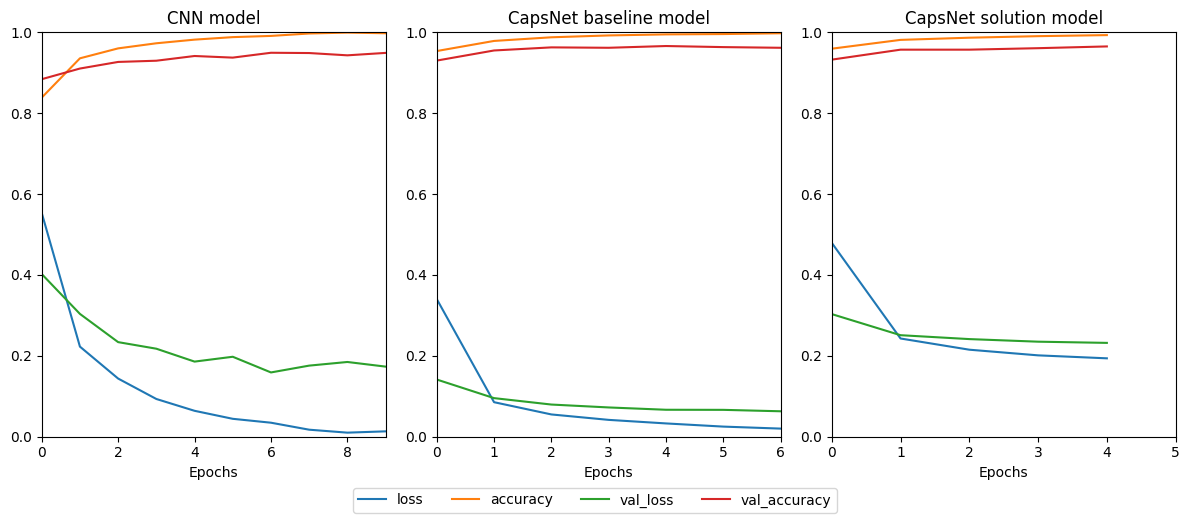

In [18]:
import matplotlib.pyplot as plt
import time
import pandas as pd

NasCapsNet.training_metrics = {
    'loss': NasCapsNet.training_metrics['loss'],
    'accuracy': NasCapsNet.training_metrics['accuracy'],
    'val_loss': NasCapsNet.training_metrics['val_loss'],
    'val_accuracy': NasCapsNet.training_metrics['val_accuracy'],
}

BaselineCapsNetModel.training_metrics = {
    'loss': BaselineCapsNetModel.training_metrics['loss'],
    'accuracy': BaselineCapsNetModel.training_metrics['accuracy'],
    'val_loss': BaselineCapsNetModel.training_metrics['val_loss'],
    'val_accuracy': BaselineCapsNetModel.training_metrics['val_accuracy'],
}

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

df_baseline = pd.DataFrame(history.history)
plot_baseline = df_baseline.plot(ax=axes[0], title="CNN model", legend=False)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, 9)

df_capsnet = pd.DataFrame(BaselineCapsNetModel.training_metrics)
plot_capsnet = df_capsnet.plot(ax=axes[1], title="CapsNet baseline model", legend=False)  # Set legend=False here
axes[1].set_ylim(0, 1)
axes[1].set_xlim(0, 6)

df_capsnet_nas = pd.DataFrame(NasCapsNet.training_metrics)
plot_capsnet_nas = df_capsnet_nas.plot(ax=axes[2], title="CapsNet solution model", legend=False)  # Set legend=False here
axes[2].set_ylim(0, 1)
axes[2].set_xlim(0, 5)

axes[0].set_xlabel("Epochs")
axes[1].set_xlabel("Epochs")
axes[2].set_xlabel("Epochs")

# Show only one legend for all three plots
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), fancybox=True, ncol=4)

plt.tight_layout()
plt.show()


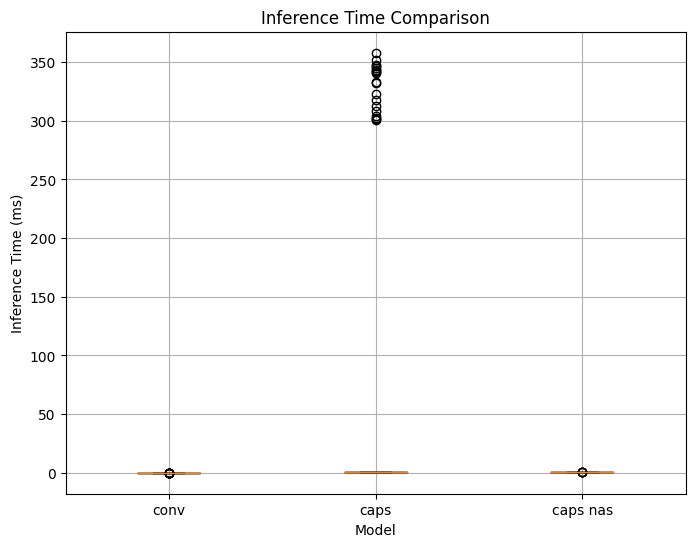

In [19]:
df = pd.DataFrame({
    "conv": cnn_inv_time,
    "caps": caps_inv_time,
    "caps nas": caps_nas_inv_time
})
plt.figure(figsize=(8, 6))
plt.boxplot(df.values, labels=df.columns)
plt.title('Inference Time Comparison')
plt.xlabel('Model')
plt.ylabel('Inference Time (ms)')
plt.grid(True)
plt.show()

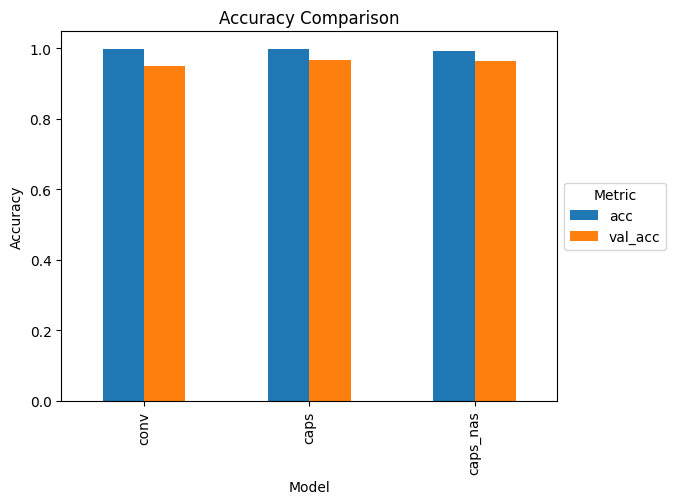

In [20]:
df = pd.DataFrame({
    'conv': {'acc': history.history['accuracy'][-1], 'val_acc': history.history['val_accuracy'][-1]},
    'caps': {'acc': BaselineCapsNetModel.training_metrics['accuracy'][-1], 'val_acc': BaselineCapsNetModel.training_metrics['val_accuracy'][-1]},
    'caps_nas': {'acc': NasCapsNet.training_metrics['accuracy'][-1], 'val_acc': NasCapsNet.training_metrics['val_accuracy'][-1]},
})

df = df.T
df.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.legend(title='Metric', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()